In [23]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 

In [15]:
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
clf = DecisionTreeRegressor( random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_

In [16]:
print(f"company_location {sum(importances[:50])}")
print(f"job_title {sum(importances[50:100])}")
print(f"experience_level {sum(importances[100:104])}")

company_location 0.43881678729987644
job_title 0.5611832127001235
experience_level 0


In [17]:
cross_val_score(pipe, X, y, cv=2).mean()

0.17095392165251716

In [292]:
column_trans.feature_names_in_

array(['company_location', 'job_title', 'experience_level'], dtype=object)

In [24]:
data = pd.read_csv('kinopoisk.csv')
data.head()
min_rate = data['rating_ball'].min()
max_rate = data['rating_ball'].max()
mean_rate = (max_rate - min_rate)/2+min_rate
print(mean_rate)

8.4585


In [52]:
def rating_to_cag(salary):
    min_rate = data['rating_ball'].min()
    max_rate = data['rating_ball'].max()
    mean_rate = (max_rate - min_rate)/2+min_rate
    if salary < mean_rate:
        return 'Low'
    return 'High'
data = pd.read_csv('kinopoisk.csv')
data['rating_ball'] = data['rating_ball'].apply(rating_to_cag)
data[:50]

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,High,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,High,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,High,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,High,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,High,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...
5,5,Начало,2010,США,High,Кобб — талантливый вор; лучший из лучших в опа...,Кристофер Нолан,Кристофер Нолан,Леонардо ДиКаприо; Джозеф Гордон-Левитт; Эллен...,'https://st.kp.yandex.net/images/film_iphone/i...
6,6,Леон,1994,Франция,High,Профессиональный убийца Леон; не знающий пощад...,Люк Бессон,Люк Бессон,Жан Рено; Гари Олдман; Натали Портман; Дэнни А...,'https://st.kp.yandex.net/images/film_iphone/i...
7,7,Король Лев,1994,США,High,У величественного Короля-Льва Муфасы рождается...,Роджер Аллерс; Роб Минкофф,Ирен Меччи; Джонатан Робертс; Линда Вулверт...,Мэттью Бродерик; Джереми Айронс; Нэйтан Лейн; ...,'https://st.kp.yandex.net/images/film_iphone/i...
8,8,Бойцовский клуб,1999,США,High,Сотрудник страховой компании страдает хроничес...,Дэвид Финчер,Джим Улс; Чак Паланик,Эдвард Нортон; Брэд Питт; Хелена Бонем Картер;...,'https://st.kp.yandex.net/images/film_iphone/i...
9,9,Иван Васильевич меняет профессию,1973,СССР,High,Инженер-изобретатель Тимофеев сконструировал м...,Леонид Гайдай,Владлен Бахнов; Леонид Гайдай; Михаил Булгаков,Александр Демьяненко; Юрий Яковлев; Леонид Кур...,'https://st.kp.yandex.net/images/film_iphone/i...


In [73]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
def rating_to_cag(salary):
    min_rate = data['rating_ball'].min()
    max_rate = data['rating_ball'].max()
    mean_rate = (max_rate - min_rate)/2+min_rate
    if salary < mean_rate:
        return 'Low'
    return 'High'
data = pd.read_csv('kinopoisk.csv')
data['rating_ball'] = data['rating_ball'].apply(rating_to_cag)
df = data.loc[:, ['year', 'country', 'director', 'rating_ball']]
X = df.drop('rating_ball', axis='columns')
y = df.rating_ball
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['country', 'director']),
    remainder='passthrough'
)
mlp = MLPClassifier(random_state=321,
                    solver="sgd", 
                    activation="tanh", 
                    alpha=0.1, 
                    hidden_layer_sizes=(1, ), 
                    max_iter=1000, 
                    tol=0.0001)
pipe = make_pipeline(column_trans, mlp)
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test) 
score = accuracy_score(y_test, predictions)
score

0.824

In [11]:
print(f"company_location {sum(importances[:50])}")
print(f"job_title {sum(importances[50:100])}")
print(f"experience_level {sum(importances[100:104])}")

company_location 0.41942934852500585
job_title 0.5805706514749941
experience_level 0


In [12]:
cross_val_score(pipe, X, y, cv=2, scoring='accuracy').mean()

0.555220818134445

In [293]:
pipe.score(X_test, y_test)

1.0

In [310]:
from sklearn.preprocessing import StandardScaler 
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
   # (StandardScaler(), ['salary_in_usd']),
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)) 
clf = DecisionTreeRegressor( random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_

In [313]:
print(sum(importances[:50]), 
sum(importances[50:100]),
sum(importances[100:104]))
#print(df['experience_level'].unique().shape)
column_trans.feature_names_in_
abs(cross_val_score(pipe, X_test, y_test, cv=10).mean())
model_score = pipe.score(X_test, y_test)
model_score

0.43886572434183746 0.5611342756581625 0


0.28744971241876693

In [315]:
cross_val_score(pipe, X, y, cv=2).mean()

0.17095392165251716

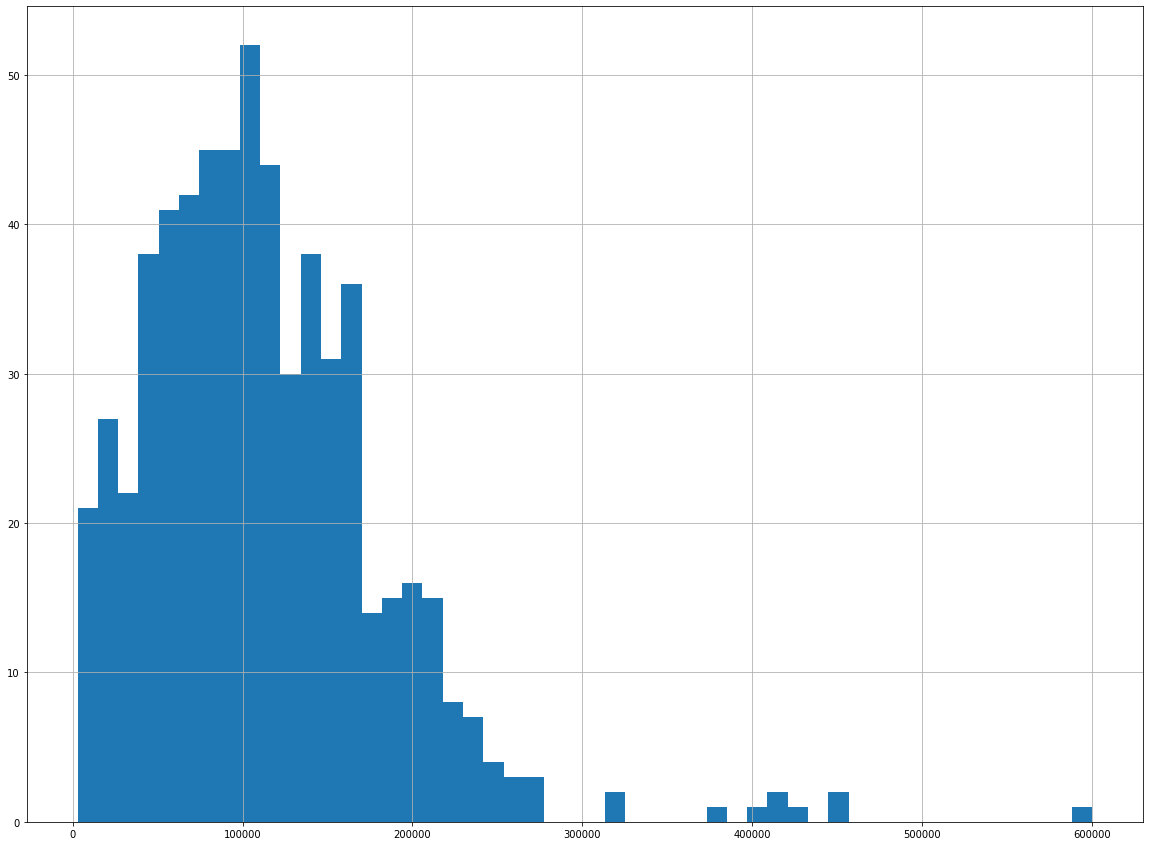

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(20,15))
plt.show()

In [259]:
model_score = pipe.score(X_test, y_test)
model_score

0.5409836065573771